In [3]:
!git clone https://github.com/Jsrsky/machine_unlearning_experiments
%cd machine_unlearning_experiments/experiments/mnist/naive

Cloning into 'machine_unlearning_experiments'...
remote: Enumerating objects: 452, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 452 (delta 11), reused 26 (delta 7), pack-reused 374 (from 3)
Receiving objects: 100% (452/452), 628.82 MiB | 39.36 MiB/s, done.
Resolving deltas: 100% (146/146), done.
Updating files: 100% (66/66), done.
/kaggle/working/machine_unlearning_experiments/experiments/mnist/naive


## Dependecies

In [4]:
import sys
from pathlib import Path
from torchvision import datasets

## Utils

In [5]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    
data_root = project_root / 'data'
data_root.mkdir(parents=True, exist_ok=True)

from notebook_setup import setup_notebook
setup_notebook()

Notebook setup completed. Project root added to sys.path: /kaggle/working/machine_unlearning_experiments


In [6]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Prepare Dataloaders
from methods.naive.naive_utils import init_dataloaders

# Train loop
from utils.train_test_metrics import train_model

# Plot losses
from utils.train_test_metrics import plot_training_history

# Test function
from utils.train_test_metrics import test_model

# Merics 
from utils.train_test_metrics import show_metrics

# Init model
from models.simple_cnn import init_model_cnn

Device used: cuda


## Parameters (arbitrary chosen)

In [7]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 10

# Simple base training

## Init model

In [ ]:
model, model_name, criterion, optimizer, transform = init_model_cnn(learning_rate=LEARNING_RATE)

## Init dataloaders

In [ ]:
train_dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)
data_split_path = 'mnist_data_splits.json'

train_loader, val_loader, test_loader, classes = init_dataloaders(
    datasets=(train_dataset, test_dataset), 
    val_ratio=0.2,
    batch_size=BATCH_SIZE,
    info_file_path = data_split_path, 
    )

## Call train

In [ ]:
import time
start_time = time.perf_counter()
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)
end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

## Plot history losses

In [ ]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Call test

In [ ]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

## Show metrics

In [ ]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)

## Utils naive

In [13]:
# Select samples to unlearn (10% random)
from utils.utils import select_samples_to_unlearn

# Update data splits
from methods.naive.naive_utils import update_splits_after_unlearning

# Recreate Dataloaders from json files
from methods.naive.naive_utils import recreate_dataloaders

# Naive unlearning

### Init new model

In [14]:
data_splits_file = "mnist_data_splits.json"
unlearn_samples_file = "mnist_samples_to_unlearn_30per.json"
updated_data_splits_path = "updated_mnist_data_splits.json"

In [15]:
model, model_name, criterion, optimizer, transform = init_model_cnn(learning_rate=LEARNING_RATE)
model_name = "naive_unlearning_" + model_name

Init model...
Done initializing model.
Model ID: 131944987393424, Optimizer ID: 131945692352944, Criterion ID: 131945692167712


### Init data

In [20]:
train_dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)

## Select samples to unlearn

In [21]:
#ONLY ONCE
select_samples_to_unlearn(data_splits_file, unlearn_samples_file, unlearn_ratio=0.3)

Unlearn indices saved to mnist_samples_to_unlearn_30per.json


## Update data splits -> delete samples

In [22]:
update_splits_after_unlearning(data_splits_file, unlearn_samples_file, updated_data_splits_path)

Updated splits saved to updated_mnist_data_splits.json


## Recreate DataLoaders from json files

In [23]:
train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=updated_data_splits_path,
    datasets=(train_dataset, test_dataset), 
    batch_size=BATCH_SIZE)

Recreating DataLoaders...
Done recreating DataLoaders.


## Re-train

In [24]:
import time
start_time = time.perf_counter()
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)
end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

Evaluating on validation set...: 100%|██████████| 132/132 [00:01<00:00, 76.81it/s]


Epoch [1/10], Train Loss: 0.2281, Train Accuracy: 0.9301, Val Loss: 0.0637, Val Accuracy: 0.9814
Epoch 1: New best validation accuracy: 0.9814. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 132/132 [00:01<00:00, 89.02it/s]


Epoch [2/10], Train Loss: 0.0544, Train Accuracy: 0.9827, Val Loss: 0.0649, Val Accuracy: 0.9816
Epoch 2: New best validation accuracy: 0.9816. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 132/132 [00:01<00:00, 79.62it/s]


Epoch [3/10], Train Loss: 0.0399, Train Accuracy: 0.9861, Val Loss: 0.0611, Val Accuracy: 0.9817
Epoch 3: New best validation accuracy: 0.9817. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 132/132 [00:01<00:00, 85.05it/s]


Epoch [4/10], Train Loss: 0.0269, Train Accuracy: 0.9916, Val Loss: 0.0415, Val Accuracy: 0.9877
Epoch 4: New best validation accuracy: 0.9877. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 132/132 [00:01<00:00, 89.47it/s]


Epoch [5/10], Train Loss: 0.0216, Train Accuracy: 0.9928, Val Loss: 0.0433, Val Accuracy: 0.9870


Evaluating on validation set...: 100%|██████████| 132/132 [00:01<00:00, 91.79it/s]


Epoch [6/10], Train Loss: 0.0151, Train Accuracy: 0.9953, Val Loss: 0.0441, Val Accuracy: 0.9882
Epoch 6: New best validation accuracy: 0.9882. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 132/132 [00:01<00:00, 85.23it/s]


Epoch [7/10], Train Loss: 0.0132, Train Accuracy: 0.9952, Val Loss: 0.0648, Val Accuracy: 0.9829


Evaluating on validation set...: 100%|██████████| 132/132 [00:01<00:00, 87.84it/s]


Epoch [8/10], Train Loss: 0.0106, Train Accuracy: 0.9962, Val Loss: 0.0522, Val Accuracy: 0.9876


Evaluating on validation set...: 100%|██████████| 132/132 [00:01<00:00, 89.22it/s]


Epoch [9/10], Train Loss: 0.0103, Train Accuracy: 0.9965, Val Loss: 0.0530, Val Accuracy: 0.9863


Evaluating on validation set...: 100%|██████████| 132/132 [00:01<00:00, 89.69it/s]

Epoch [10/10], Train Loss: 0.0058, Train Accuracy: 0.9981, Val Loss: 0.0459, Val Accuracy: 0.9891
Epoch 10: New best validation accuracy: 0.9891. Model saved to naive_unlearning_CNN_MNIST_model.pth.
Training complete for naive_unlearning_CNN_MNIST. Training stats saved to 'naive_unlearning_CNN_MNIST_history.json'.
Execution time: 102.453943 seconds


## Plot history losses

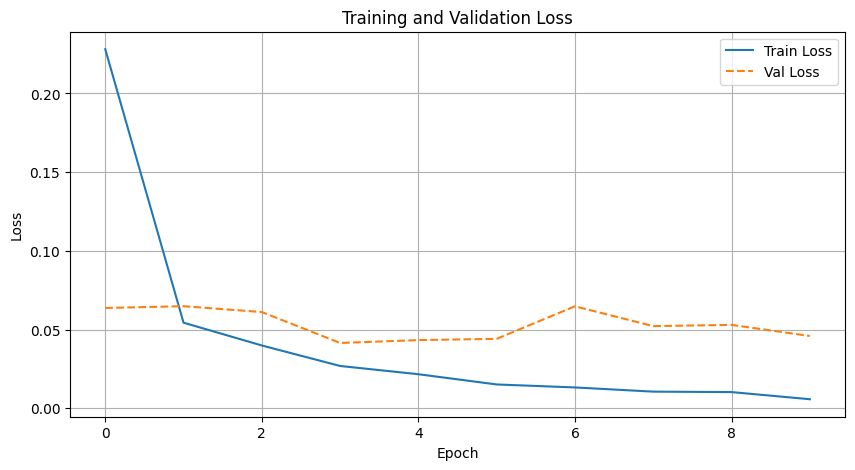

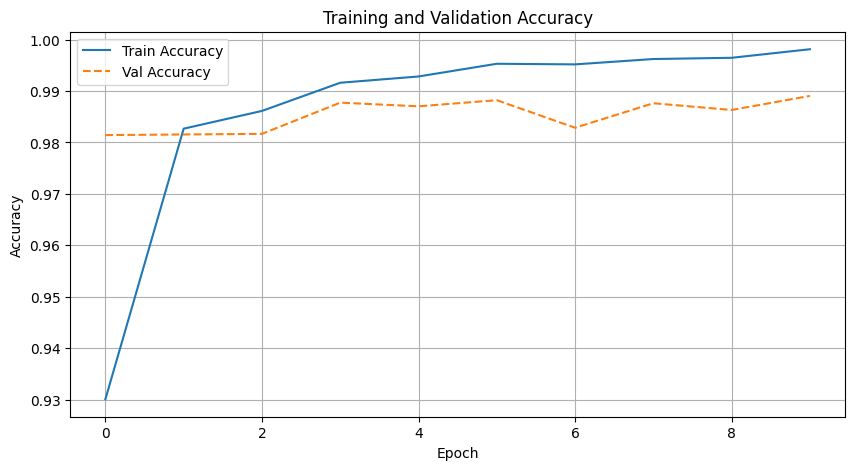

In [25]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Re-test

In [26]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: naive_unlearning_CNN_MNIST


Evaluating model: naive_unlearning_CNN_MNIST_model.pth: 100%|██████████| 157/157 [00:02<00:00, 67.16it/s]

Predictions and labels saved to naive_unlearning_CNN_MNIST_predictions.json


## Show metrics

Metrics for naive_unlearning_CNN_MNIST:
  - Test Accuracy: 0.9894
  - Precision: 0.9894
  - Recall: 0.9894
  - F1 Score: 0.9894


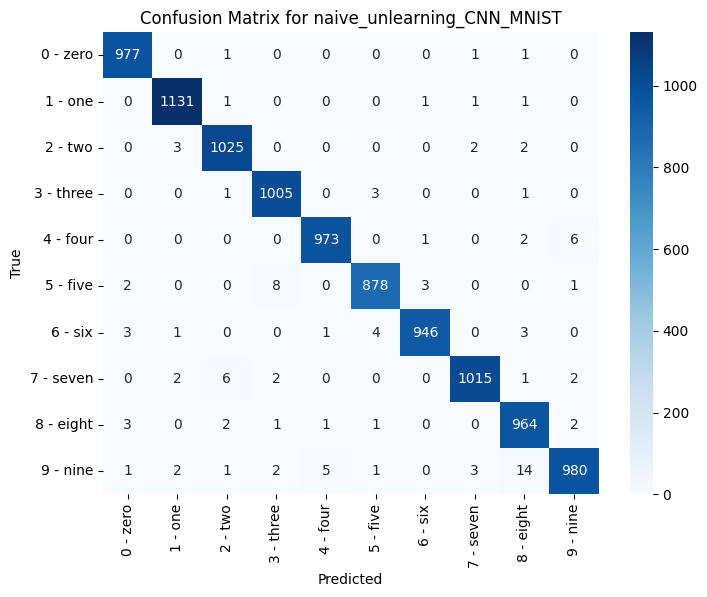

In [27]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)